In [ ]:
! pip install kaggle

In [ ]:
pip install fastai==v2.7.18

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from fastai.tabular.all import *

In [ ]:
creds = '{"username":"navidfalah","key":"2dcec140d80bff7c7158857678855827"}'

In [ ]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    with open(cred_path, 'w') as f:
        f.write(creds)
    cred_path.chmod(0o600)

In [ ]:
cred_path

Path('/root/.kaggle/kaggle.json')

In [ ]:
path = URLs.path('bluebook')
path

Path('/root/.fastai/archive/bluebook')

In [ ]:
!kaggle competitions download -c bluebook-for-bulldozers

bluebook-for-bulldozers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/bluebook-for-bulldozers.zip

Archive:  /content/bluebook-for-bulldozers.zip
replace Data Dictionary.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df_train = pd.read_csv('/content/TrainAndValid.csv')

<ipython-input-106-a39ae29fcb7e>:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/TrainAndValid.csv')


In [ ]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
df_train["ProductSize"].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [ ]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

df_train['ProductSize'] = df_train['ProductSize'].astype('category')
df_train['ProductSize'].cat.set_categories(sizes, ordered=True)

,ProductSize
0,NaN
1,Medium
2,NaN
3,Small
4,NaN
...,...
412693,Mini
412694,Mini
412695,Mini
412696,Mini


In [ ]:
dep_var = 'SalePrice'
df_train[dep_var] = np.log(df_train[dep_var])

In [ ]:
df_train[dep_var]

,SalePrice
0,11.097410
1,10.950807
2,9.210340
3,10.558414
4,9.305651
...,...
412693,9.210340
412694,9.259131
412695,9.433484
412696,9.210340


In [ ]:
df_train = add_datepart(df_train, 'saledate')

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


In [ ]:
df_test = pd.read_csv('/content/Test.csv')
df_test = add_datepart(df_test, 'saledate')

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


In [ ]:
''.join(o+"  " for o in df_train.columns if o.startswith('sale'))

'saleYear  saleMonth  saleWeek  saleDay  saleDayofweek  saleDayofyear  saleIs_month_end  saleIs_month_start  saleIs_quarter_end  saleIs_quarter_start  saleIs_year_end  saleIs_year_start  saleElapsed  '

In [ ]:
procs = [Categorify, FillMissing]

In [ ]:
cond = (df_train.saleYear<2011) | (df_train.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx),list(valid_idx))

In [ ]:
con, cat = cont_cat_split(df_train, 1, dep_var=dep_var)
to = TabularPandas(df_train, procs, cat, con, y_names=dep_var, splits=splits)

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [ ]:
len(to.train), len(to.valid)

(404710, 7988)

In [ ]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [ ]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,963,298,43,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,1,1,1,1,1,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1745,529,57,104,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,1,1,1,1,1,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,336,111,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,1,1,1,1,1,1,1.077754e+09,1,1


In [ ]:
### now we create the decision tree

xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [ ]:
from sklearn.tree import DecisionTreeRegressor # import the DecisionTreeRegressor class from sklearn.tree

m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=4)

In [ ]:
!pip install fastbook
from fastbook import draw_tree

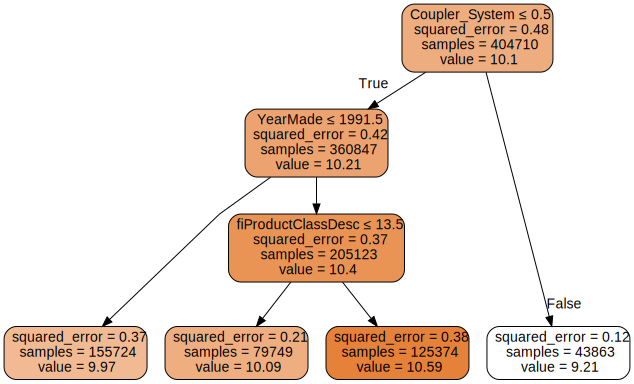

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

In [ ]:
m = DecisionTreeRegressor()
m.fit(xs, y)

DecisionTreeRegressor()

In [ ]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)
m_rmse(m, xs, y)

0.0

In [ ]:
m_rmse(m, valid_xs, valid_y)

0.334084

In [ ]:
m.get_n_leaves(), len(xs)

(324351, 404710)

In [ ]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(xs, y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.210309, 0.26274)

In [ ]:
m.get_n_leaves(), len(xs)

(12435, 404710)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def rf(xs, y, n_estimators=40, max_samples=200_000,
 max_features=0.5, min_samples_leaf=5, **kwargs):
 return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
 max_samples=max_samples, max_features=max_features,
 min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
m = rf(xs, y);

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.171372, 0.233379)

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
preds.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

(40, 7988)

In [ ]:
pred_std = preds.std(0)

In [ ]:
pred_std[:5]

array([0.2417661 , 0.10740731, 0.12120502, 0.25596296, 0.13158224])

In [ ]:
### we also needs to know how the mode is trying to predict

def rf_feat_importance(m, df):
  return pd.DataFrame({
      'cols':df.columns,
      'imp':m.feature_importances_
  }).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.179529
30,Coupler_System,0.127286
6,ProductSize,0.115303
7,fiProductClassDesc,0.086515
54,ModelID,0.059134
65,saleElapsed,0.049298
32,Hydraulics_Flow,0.048019
3,fiSecondaryDesc,0.037045
1,fiModelDesc,0.035557
31,Grouser_Tracks,0.029894


In [ ]:
def plot_fi(fi):
  return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

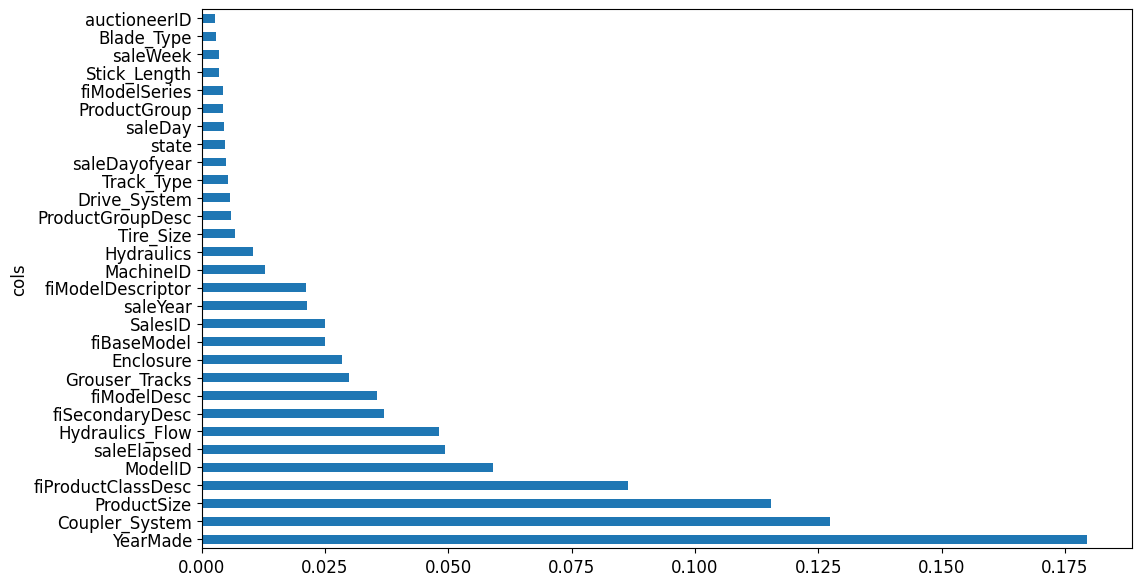

In [ ]:
plot_fi(fi[:30]);

In [ ]:
### remove the low importance variables and get a good score

to_keep =  fi[fi.imp>0.005].cols
len(to_keep)

21

In [ ]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [ ]:
m = rf(xs_imp, y);

In [ ]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181639, 0.230724)

In [ ]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

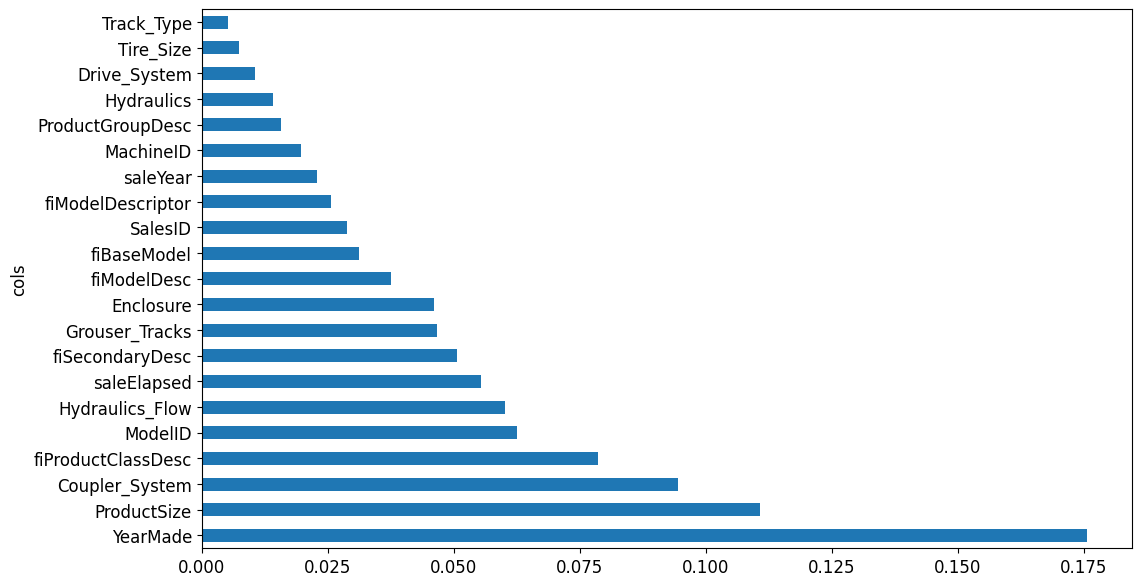

In [ ]:
plot_fi(rf_feat_importance(m, xs_imp));

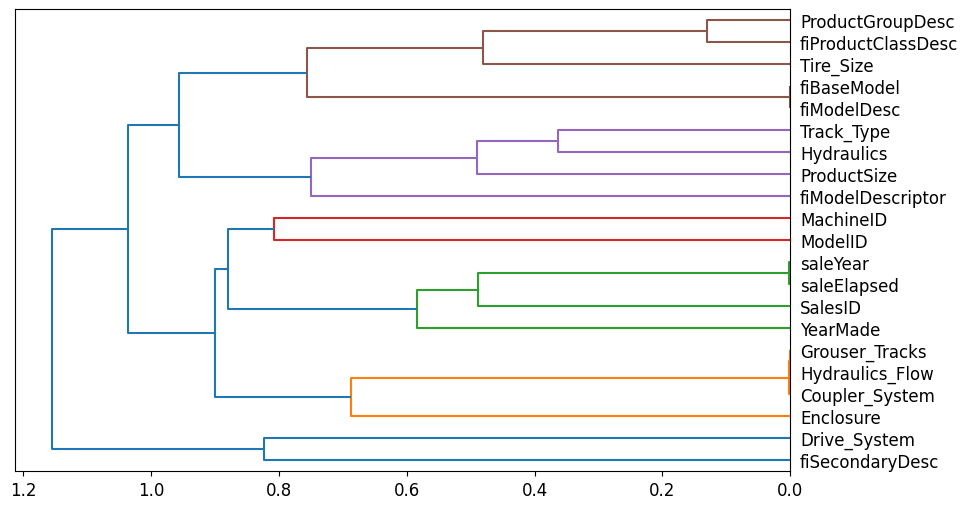

In [ ]:
from fastbook import cluster_columns # import the function from fastbook

cluster_columns(xs_imp) # Now the function should be available

In [ ]:
def get_oob(df):
  m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
                            max_samples=50000, max_features=0.5,
                            oob_score=True).fit(df, y)
  return m.oob_score_

In [ ]:
get_oob(xs_imp)

0.875049592354823

In [ ]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
 'saleYear', 'saleElapsed', 'ProductGroupDesc',
 'fiModelDesc', 'fiBaseModel',
 'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

KeyboardInterrupt: 

In [ ]:
to_drop = ['saleYear','ProductGroupDesc','fiBaseModel','Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8727072825858675

In [ ]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [ ]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.183614, 0.23264)

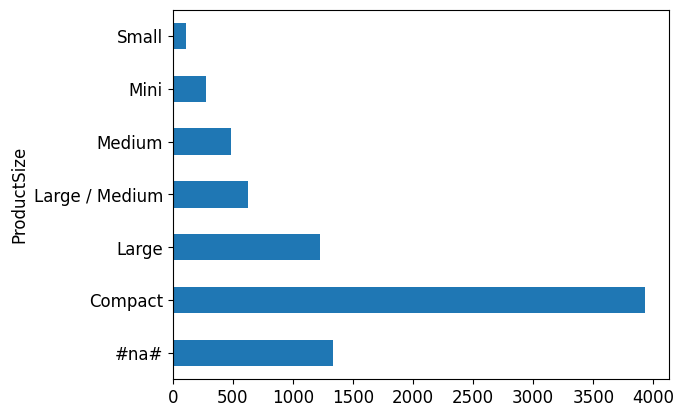

In [ ]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

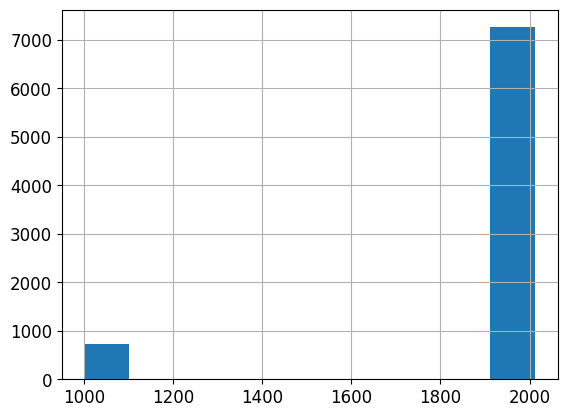

In [ ]:
ax = valid_xs_final['YearMade'].hist()

In [ ]:
!pip install treeinterpreter
!pip install waterfallcharts

In [ ]:
row = valid_xs_final.iloc[:5]
row

,YearMade,Coupler_System,ProductSize,fiProductClassDesc,ModelID,saleElapsed,Hydraulics_Flow,fiSecondaryDesc,fiModelDesc,Enclosure,SalesID,fiModelDescriptor,MachineID,Hydraulics,Tire_Size,Drive_System,Track_Type
22915,1000,0,4,48,4124,1.317600e+09,0,43,2301,1,1218822,0,1024652,1,0,0,0
22916,2006,0,0,2,24808,1.317859e+09,0,50,278,6,1218823,17,1067601,0,0,2,0
22917,2006,2,0,41,9580,1.317859e+09,3,0,4514,6,1218824,0,1010582,4,0,0,0
22918,2003,2,0,44,6270,1.317859e+09,3,0,4213,6,1218825,0,1026609,4,0,0,0
22919,2007,0,0,1,17976,1.317859e+09,0,21,4647,6,1218826,0,1032638,0,0,2,0


In [ ]:
import treeinterpreter
from treeinterpreter import treeinterpreter

prediction, bias, contributions = treeinterpreter.predict(m, row.values)

In [ ]:
prediction[0], bias[0], contributions[0].sum()

(array([9.95041012]), 10.104429895366433, -0.1540197769183059)

In [ ]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))
m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
5,saleElapsed,0.882914
10,SalesID,0.089391
12,MachineID,0.022362
0,YearMade,0.000863
8,fiModelDesc,0.000701
9,Enclosure,0.000588


In [ ]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))
for c in ('SalesID','saleElapsed','MachineID'):
  m = rf(xs_final.drop(c,axis=1), y)
  print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.232784
SalesID 0.230184
saleElapsed 0.236169
MachineID 0.231418


In [ ]:
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)
m = rf(xs_final_time, y)

In [ ]:
m_rmse(m, valid_xs_time, valid_y)

0.229235

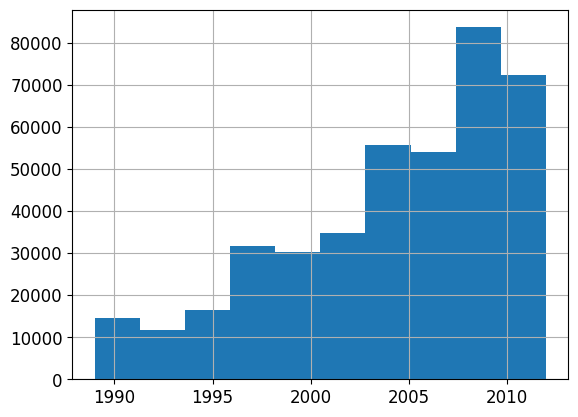

In [ ]:
xs['saleYear'].hist();

In [ ]:
### removing the old data
filt = xs['saleYear']>2004
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MachineID
- SalesID


In [ ]:
### doing it using nn instead of the random forest

df_nn = pd.read_csv('/content/TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


In [ ]:
df_nn_final = df_nn[list(xs_final.columns)+[dep_var]]

In [ ]:
cont_nn, cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [ ]:
cont_nn, cat_nn

(['saleElapsed', 'SalesID', 'MachineID'],
 ['YearMade',
  'Coupler_System',
  'ProductSize',
  'fiProductClassDesc',
  'ModelID',
  'Hydraulics_Flow',
  'fiSecondaryDesc',
  'fiModelDesc',
  'Enclosure',
  'fiModelDescriptor',
  'Hydraulics',
  'Tire_Size',
  'Drive_System',
  'Track_Type'])

In [ ]:
df_nn_final[cat_nn].nunique()

,0
YearMade,73
Coupler_System,2
ProductSize,6
fiProductClassDesc,74
ModelID,5281
Hydraulics_Flow,3
fiSecondaryDesc,177
fiModelDesc,5059
Enclosure,6
fiModelDescriptor,140


In [ ]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
m2 = rf(xs_filt2, y_filt)

In [ ]:
cat_nn.remove('fiModelDescriptor')

In [ ]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
 splits=splits, y_names=dep_var)

In [ ]:
dls = to_nn.dataloaders(1024)

In [ ]:
y = to_nn.train.y
y.min(),y.max()

(8.465899467468262, 11.863582611083984)

In [ ]:
learn = tabular_learner(dls, y_range=(8, 12), layers=[500, 250], n_out=1, loss_func=F.mse_loss)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

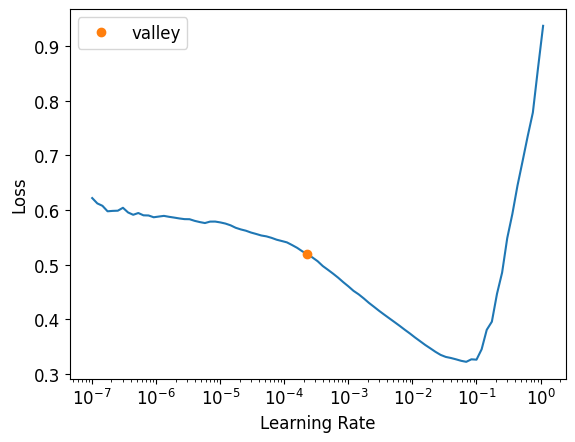

In [ ]:
min_lr = learn.lr_find()

In [ ]:
min_lr

SuggestedLRs(valley=0.0002290867705596611)

In [ ]:
learn.fit_one_cycle(5, min_lr)

epoch,train_loss,valid_loss,time
0,0.066757,0.078368,00:38
1,0.051094,0.082421,00:34
2,0.045175,0.057837,00:36
3,0.041367,0.058077,00:34
4,0.040222,0.055174,00:34


In [ ]:
preds, targs = learn.get_preds()
r_mse(preds, targs)

0.234891

In [ ]:
learn.save('nn')

Path('models/nn.pth')

In [ ]:
rf_preds = m.predict(valid_xs_final)
ens_prds = (to_np(preds.squeeze()) + rf_preds) /2